In [2]:
import polars as pl
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_parquet('../04_EDA/car_ads_model.parquet')

In [11]:
df.shape

(182826, 14)

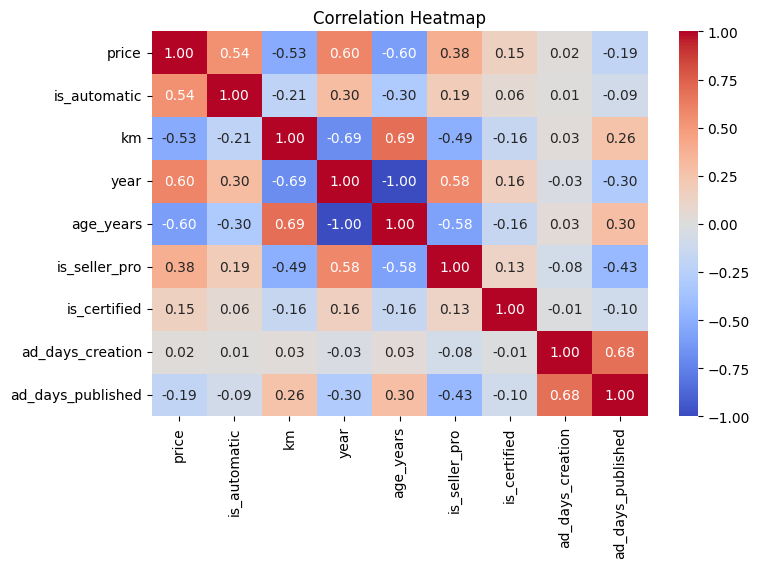

In [12]:
# Generate a heatmap to visualize correlations
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [87]:
df_model_1 = df[['price', 'brand', 'model', 'is_automatic', 'km', 'fuel', 'age_years', 'is_seller_pro']]

In [88]:
models_rank_num_ads = (
    df_model_1
    .groupby(['brand','model'])['model'].value_counts().reset_index()
    .sort_values(by='count', ascending=False).reset_index(drop=True)
)

In [89]:
models_rank_num_ads.iloc[:10,:]

,brand,model,count
0,volkswagen,golf,5251
1,bmw,serie 3,3536
2,seat,leon,3330
3,seat,ibiza,2813
4,audi,a3,2650
5,mercedes-benz,clase a,2619
6,ford,focus,2501
7,mercedes-benz,clase c,2494
8,bmw,serie 1,2432
9,renault,megane,2386


In [90]:
df_model_1 = (
    df_model_1
    .merge(models_rank_num_ads.iloc[:10,:][['brand', 'model']],
           left_on=['brand', 'model'],
            right_on=['brand', 'model'],
            how='inner')
 )

<Axes: xlabel='age_years', ylabel='price'>

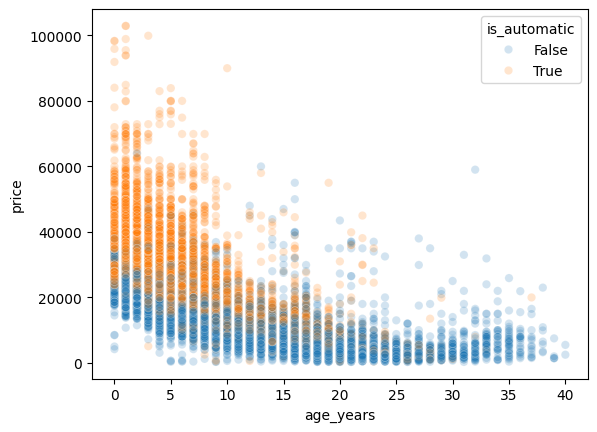

In [91]:
sns.scatterplot(data=df_model_1, x='age_years', y='price', hue='is_automatic', alpha=0.2)

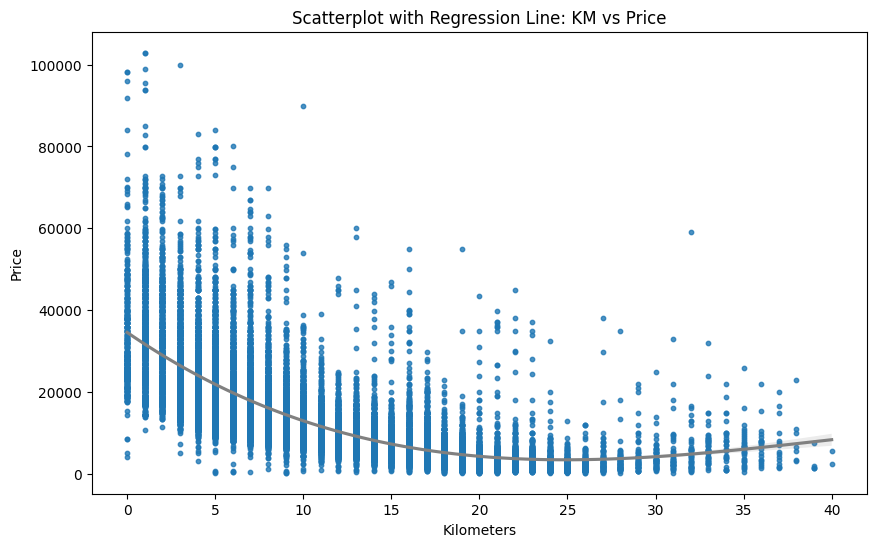

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl


# Example: Scatterplot of 'km' vs 'price' with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age_years', y='price', data=df_model_1, order=3, scatter_kws={'s': 10}, line_kws={'color': 'grey'})
plt.title('Scatterplot with Regression Line: KM vs Price')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.show()


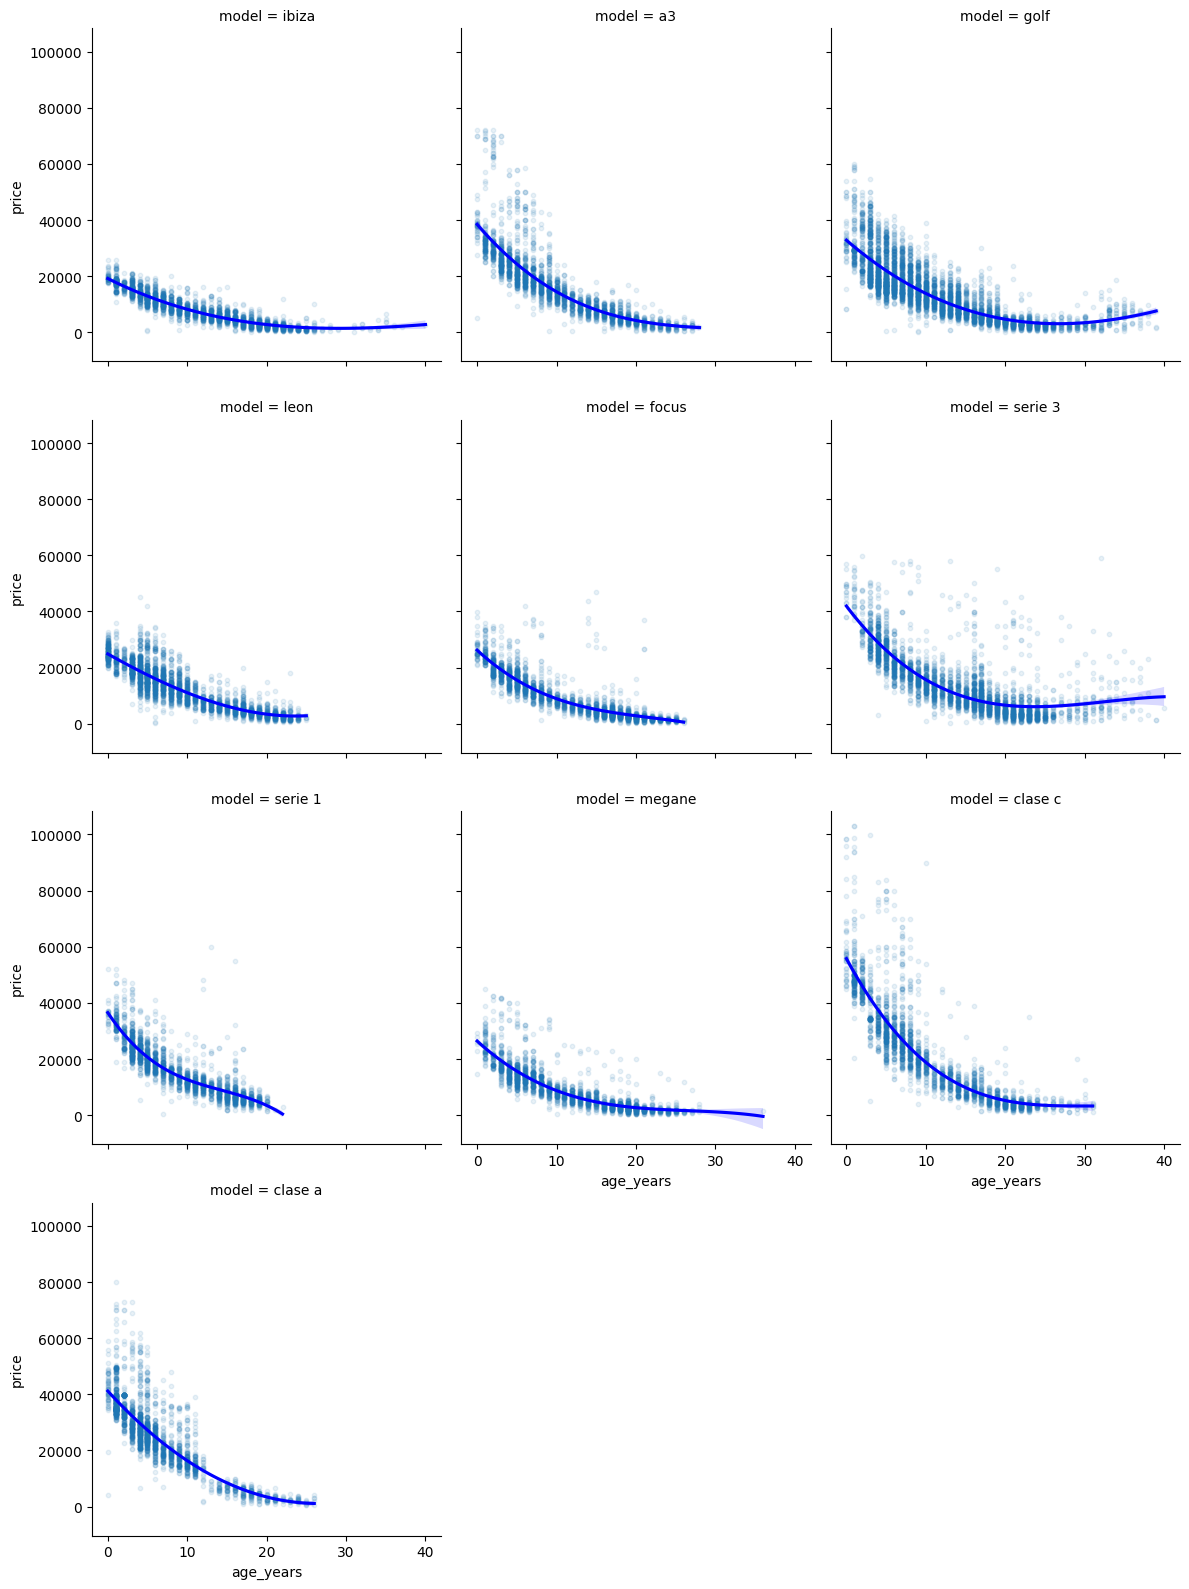

In [102]:
# Example: Plot regression lines for each brand
sns.lmplot(x='age_years', y='price',
           data=df_model_1, col='model', order=3,
        col_wrap=3, height=4, scatter_kws={'s': 10, 'alpha':0.1}, line_kws={'color': 'blue'})
plt.show()
